<h1>Roller Coaster Visualization Project</h1>
<p>The goal of this project is to create visualizations to give insight into the world of roller coasters</p>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

<p> Make sure both csv files are in the same folder as the ipynb file. Then we obtain some info on both datasets</p>

In [2]:
rc_wood=pd.read_csv('Golden_Ticket_Award_Winners_Wood.csv')
rc_steel=pd.read_csv('Golden_Ticket_Award_Winners_Steel.csv')

In [3]:
print('rc_wood: {} rows, {} columns'.format(rc_wood.shape[0], rc_wood.shape[1]))
print('rc_steel: {} rows, {} columns'.format(rc_steel.shape[0], rc_steel.shape[1]))

rc_wood: 180 rows, 8 columns
rc_steel: 180 rows, 8 columns


In [4]:
#rc_wood.columns=rc_wood.columns.replace(' ','_',regex=True)
rc_wood.columns=[s.lower().replace(' ','_') for s in rc_wood.columns]
rc_steel.columns=[s.lower().replace(' ','_') for s in rc_steel.columns]
print(rc_wood.head(10))
print()
print(rc_steel.head(10))

   rank               name                       park             location  \
0     1       Boulder Dash             Lake Compounce       Bristol, Conn.   
1     2            El Toro  Six Flags Great Adventure        Jackson, N.J.   
2     3            Phoenix  Knoebels Amusement Resort        Elysburg, Pa.   
3     4         The Voyage              Holiday World    Santa Claus, Ind.   
4     5        Thunderhead                  Dollywood  Pigeon Forge, Tenn.   
5     6    Ravine Flyer II                  Waldameer            Erie, Pa.   
6     7         Outlaw Run         Silver Dollar City         Branson, Mo.   
7     8          The Beast               Kings Island    Kings Mills, Ohio   
8     9    Lightning Racer                Hersheypark         Hershey, Pa.   
9    10  Shivering Timbers       Michigan’s Adventure      Muskegon, Mich.   

           supplier  year_built  points  year_of_rank  
0               CCI        2000    1333          2013  
1           Intamin        20

In [5]:
print(rc_wood.year_of_rank.unique())
print(rc_steel.year_of_rank.unique())

[2013 2014 2015 2016 2017 2018]
[2013 2014 2015 2016 2017 2018]


<p>In case you where wondering about the ranking of your favorite roller coaster, you can check it using the next function. Just enter the name as the first argument, the park is located in, and the dataframe is located in as a third argument.</p>

In [6]:
def rc_graph(rc,park_name, df):
    t=df[(df.name==rc) & (df.park==park_name)]
    years=t.year_of_rank
    ranking=t['rank']
    ax=plt.subplot()
    plt.plot(years,ranking, color='blue',linewidth=2)
    ax.set_xticks(years)
    ax.set_xticklabels(years)
    ax.set_yticks(ranking)
    ax.set_yticklabels(ranking)
    plt.xlabel('Year of Ranking')
    plt.ylabel('Ranking')
    plt.title( rc+"'s ranking over the years")
    plt.show()

<p>Now let's see some examples:</p>

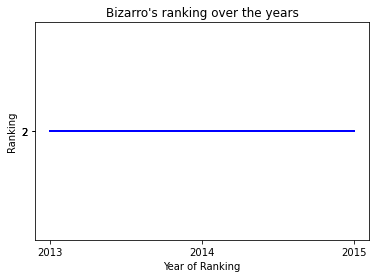

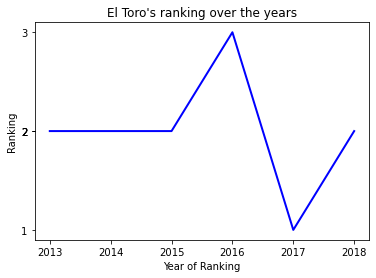

In [7]:
rc_graph('Bizarro','Six Flags New England', rc_steel)
rc_graph('El Toro', 'Six Flags Great Adventure',rc_wood)


<p>Now let's check our graph with our dataframe</p>

In [8]:
print(rc_steel[(rc_steel.name=='Bizarro')&(rc_steel.park=='Six Flags New England')].reset_index(drop=True))
print(rc_wood[(rc_wood.name=='El Toro')&(rc_wood.park=='Six Flags Great Adventure')].reset_index(drop=True))

   rank     name                   park       location supplier  year_built  \
0     2  Bizarro  Six Flags New England  Agawam, Mass.  Intamin        2000   
1     2  Bizarro  Six Flags New England  Agawam, Mass.  Intamin        2000   
2     2  Bizarro  Six Flags New England  Agawam, Mass.  Intamin        2000   

   points  year_of_rank  
0    1011          2013  
1    1049          2014  
2     929          2015  
   rank     name                       park       location supplier  \
0     2  El Toro  Six Flags Great Adventure  Jackson, N.J.  Intamin   
1     2  El Toro  Six Flags Great Adventure  Jackson, N.J.  Intamin   
2     2  El Toro  Six Flags Great Adventure  Jackson, N.J.  Intamin   
3     3  El Toro  Six Flags Great Adventure  Jackson, N.J.  Intamin   
4     1  El Toro  Six Flags Great Adventure  Jackson, N.J.  Intamin   
5     2  El Toro  Six Flags Great Adventure  Jackson, N.J.  Intamin   

   year_built  points  year_of_rank  
0        2006    1302          2013  
1    

<p>If we want to compare two roller coasters we can use the following function. Just as the prior one, set the arguments to the name, park and the dataset is located in for each roller coaster. </p>

In [9]:
def rc_compare(name1,park1,df1,name2,park2,df2):
    t1=df1[(df1.name==name1)&(df1.park==park1)]
    t2=df2[(df2.name==name2)&(df2.park==park2)]
    years=[list(t1.year_of_rank), list(t2.year_of_rank)]
    rankings=[list(t1['rank']), list(t2['rank'])]
    ax=plt.subplot()
    plt.plot(years[0],rankings[0], color='blue', linewidth=2, label=name1)
    plt.plot(years[1],rankings[1], color='green', linewidth=2, label=name2)
    ax.set_xticks(list(set(years[0]+years[1])))
    ax.set_xticklabels(list(set(years[0]+years[1])))
    ax.set_yticks(list(set(rankings[0]+rankings[1])))
    ax.set_yticklabels(list(set(rankings[0]+rankings[1])))
    plt.xlabel('Year of ranking')
    plt.ylabel('Ranking')
    plt.legend()
    plt.title('Comparison of your two favorite roller coasters')
    plt.show()

<p>Now let's see some examples using this function:</p>

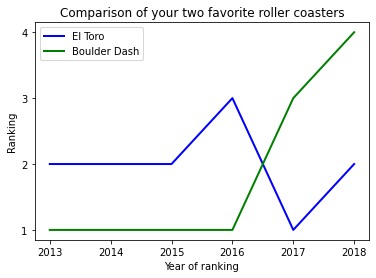

In [10]:
rc_compare('El Toro','Six Flags Great Adventure',rc_wood,'Boulder Dash','Lake Compounce',rc_wood)

<p>Now let's check our graph with our dataframes</p>

In [11]:
name1='El Toro'
park1='Six Flags Great Adventure'
name2='Boulder Dash'
park2='Lake Compounce'
t1=rc_wood[(rc_wood.name==name1)&(rc_wood.park==park1)].reset_index(drop=True)
t2=rc_wood[(rc_wood.name==name2)&(rc_wood.park==park2)].reset_index(drop=True)
print(t1)
print()
print(t2)


   rank     name                       park       location supplier  \
0     2  El Toro  Six Flags Great Adventure  Jackson, N.J.  Intamin   
1     2  El Toro  Six Flags Great Adventure  Jackson, N.J.  Intamin   
2     2  El Toro  Six Flags Great Adventure  Jackson, N.J.  Intamin   
3     3  El Toro  Six Flags Great Adventure  Jackson, N.J.  Intamin   
4     1  El Toro  Six Flags Great Adventure  Jackson, N.J.  Intamin   
5     2  El Toro  Six Flags Great Adventure  Jackson, N.J.  Intamin   

   year_built  points  year_of_rank  
0        2006    1302          2013  
1        2006    1291          2014  
2        2006    1464          2015  
3        2006    1121          2016  
4        2009    1241          2017  
5        2006    1197          2018  

   rank          name            park        location         supplier  \
0     1  Boulder Dash  Lake Compounce  Bristol, Conn.              CCI   
1     1  Boulder Dash  Lake Compounce  Bristol, Conn.              CCI   
2     1  Boul

<p>Another interesting metric is how the latest top n ranked roller coasters have changed with time. We can visualize it using the following function:</p>

In [12]:
def top_n(n, df):
    t=df[df.year_of_rank==max(df.year_of_rank)].sort_values(by=['rank'],ascending=True)
    t=t.iloc[:n][['name','park']] #name and park of top n rc's
    names=t.name
    topN=df[(df.name.isin(names))&(df.park.isin(t.park))]
    ax=plt.subplot()
    rankings=[]
    years=[]
    for current_name in names:
        data=topN[topN.name==current_name]
        y=list(data.year_of_rank)
        r=list(data['rank'])
        rankings+=r
        years+=y
        plt.plot(y,r,label=current_name,linewidth=2)
    ax.set_xticks(list(set(years)))
    ax.set_xticklabels(list(set(years)))
    ax.set_yticks(list(set(rankings)))
    ax.set_yticklabels(list(set(rankings)))
    plt.title('Comparison of the top {} rollercoasters'.format(n))
    plt.xlabel('Year of Ranking')
    plt.ylabel('Rank')
    plt.legend()
    plt.show()



<p>Let's visualize how the current top 5 wood roller coasters have developed through the years!</p>

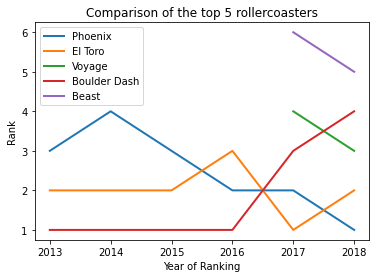

In [13]:
top_n(5,rc_wood)

<h1>Roller Coaster Statistics</h1>
<p>This section will help us gain a more deep insight of the data collected about roller coasters rather than their rankings alone</p>

<p>First we'll take a peek at our data set describing different roller coasters</p>

In [14]:
rc=pd.read_csv('roller_coasters.csv')
print('rc dataframe contains {} rows, {} columns'.format(rc.shape[0], rc.shape[1]))
print()
print(rc.head(10))

rc dataframe contains 2802 rows, 10 columns

                     name material_type seating_type  speed  height  length  \
0                Goudurix         Steel     Sit Down   75.0    37.0   950.0   
1           Dream catcher         Steel    Suspended   45.0    25.0   600.0   
2              Alucinakis         Steel     Sit Down   30.0     8.0   250.0   
3                Anaconda        Wooden     Sit Down   85.0    35.0  1200.0   
4                  Azteka         Steel     Sit Down   55.0    17.0   500.0   
5             Bat Coaster         Steel     Inverted   70.0    20.0   400.0   
6  Batman : Arkham Asylum         Steel     Inverted   80.0    32.0   823.0   
7    Big Thunder Mountain         Steel     Sit Down   60.0    22.0  1500.0   
8               EqWalizer         Steel     Sit Down   76.0    36.0   285.0   
9           Calamity Mine         Steel     Sit Down   48.0    14.0   785.0   

   num_inversions     manufacturer                  park            status  
0       

<p>Where:
    <ul>
        <li><b>name</b>: name of the roller coaster</li>
        <li><b>material_type</b>: material used to build the roller coaster</li>
        <li><b>seating_type</b>: type of seating used on the roller coaster</li>
        <li><b>speed</b>: maximum speed of the roller coaster in Km/h</li>
        <li><b>height</b>: maximum height of the roller coaster in meters</li>
        <li><b>length</b>: length of the roller coaster in meters</li>
        <li><b>num_inversions</b>: total number of inversions</li>
        <li><b>manufacturer</b>: whom made the roller coaster</li>
        <li><b>park</b>: park where it is located</li>
        <li><b>status</b>: operating status</li>
    </ul>
</p>

<p>A histogram showing the speed of the roller coasters is presented below along with a function that helps us make it easier to plot</p>

In [15]:
def make_hist(df, col_name):
    d=df[col_name]
    plt.hist(d)
    plt.ylabel(col_name.title())
    plt.show()

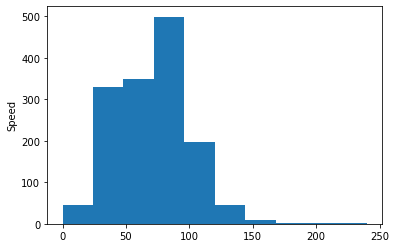

In [16]:
make_hist(rc,'speed')

<p>If we want to take a look at how many inversions the roller coasters of a certain park have the function defined below might come in handy</p>

In [17]:
def inversions_by_park(df, park):
    names=list(df[df['park']==park].name)
    inversions=list(df[(df.park==park)&(df.name.isin(names))].num_inversions)
    ax=plt.subplot()
    plt.bar(range(len(names)), inversions, color='orange')
    ax.set_xticks(range(len(names)))
    ax.set_xticklabels(names, rotation=90)
    plt.xlabel('Roller Coaster')
    ax.set_yticks([int(i) for i in inversions])
    ax.set_yticklabels([int(i) for i in inversions])
    plt.ylabel('Number of Inversions')
    plt.title('Inversions per roller coaster in '+park)
    plt.show()

    

<p>Let's take a look at the roller coasters of Parc Asterix and Parque Warner Madrid</p>

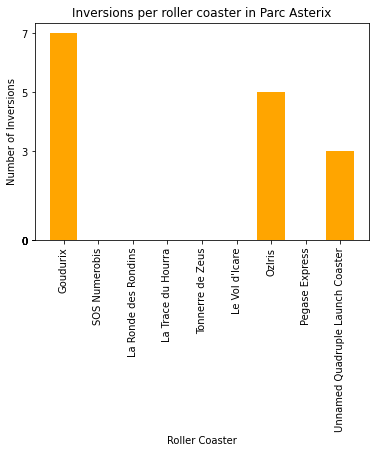

In [18]:
inversions_by_park(rc, 'Parc Asterix')

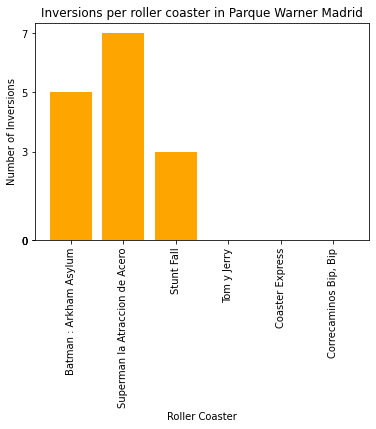

In [19]:
inversions_by_park(rc, 'Parque Warner Madrid')

<p>We will now explore the relation between open and definitely closed roller coasters by using a pie chart</p>


operating= 2172
closed= 439
ratio= 4.947608200455581


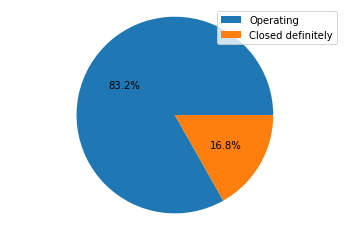

In [28]:
open_rc=rc[rc.status=='status.operating'].status.count()
closed_rc=rc[rc.status=='status.closed.definitely'].status.count()
print('operating= {}'.format(open_rc))
print('closed= {}'.format(closed_rc))
print('ratio= {}'.format(open_rc*1.0/closed_rc))
plt.pie([open_rc, closed_rc], autopct='%0.1f%%')
plt.axis('equal')
plt.legend(['Operating','Closed definitely'])
plt.show()

<p>Lastly we will analyze what type of seat is the most popular within the observed roller coasters</p>

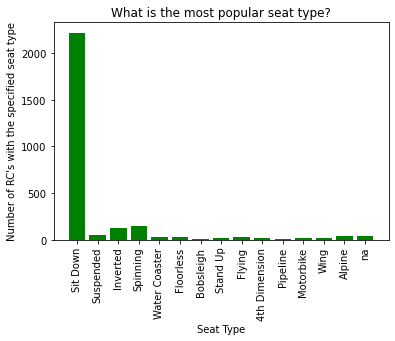

In [36]:
seat_types=rc.seating_type.unique()
occurrences=[]
from numpy import std, mean, array
for st in seat_types:
    occurrences.append(rc[rc.seating_type==st].seating_type.count())
ax=plt.subplot()
plt.bar(range(len(seat_types)), occurrences, color='green')
plt.xlabel('Seat Type')
ax.set_xticks(range(len(seat_types)))
ax.set_xticklabels(seat_types, rotation=90)
plt.ylabel("Number of RC's with the specified seat type")
plt.title('What is the most popular seat type?')
plt.show()

In [37]:
10^6


12